# YOLO for Dental Object Detection

This Colab notebook demonstrates the application of YOLO for detecting teeth in panorama images by drawing bounding boxes around them. Given the importance of precise tooth localization in dentistry for diagnosis and treatment planning, YOLO’s real-time detection capability can assist in automated assessments, reducing manual annotation time. The notebook covers loading a pre-trained YOLO model, running inference on dental images, and visualizing detected teeth with bounding boxes. Additionally, users can fine-tune the model on a custom dataset to improve detection accuracy, making it suitable for applications such as cavity detection, orthodontic analysis, and surgical planning.

# Installing Dependencies

In [1]:
!pip install ultralytics supervision inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pydantic-settings to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pydantic-settings to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for gui

# Authentication
Visit Roboflow and fetch an API key

In [1]:
import os
from getpass import getpass

os.environ['ROBOFLOW_API_KEY'] = getpass('Enter the api key: ')

Enter the api key: ··········


# Teeth Detection

In [2]:
# Variables
ROOT_PATH = "/content"
IMAGE_NAME = "panorama.png"

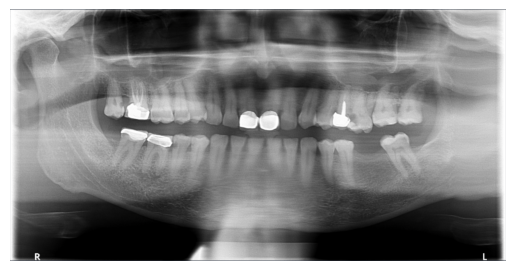

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

## Load and Display Image
image_path = os.path.join(ROOT_PATH, IMAGE_NAME)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration d

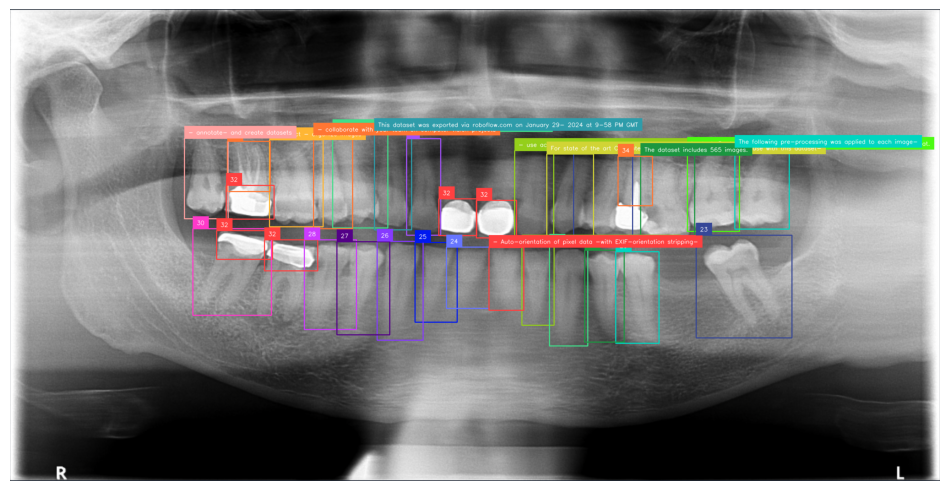

In [6]:
from inference import get_model
import supervision as sv
import cv2

# define the image url to use for inference
image = cv2.imread(image_path)

# load a pre-trained yolov8n model
model = get_model(model_id="teeth-itiko/1466", api_key=os.environ['ROBOFLOW_API_KEY'])

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)